In [24]:
import pandas as pd
import numpy as np

In [25]:
from keras.preprocessing import sequence
from keras.utils import np_utils

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Embedding

In [27]:
import matplotlib.pyplot as plt

In [28]:
dataset = pd.read_csv('/home/lab606a/Documents/datasets/20/dataset_20200225_20.csv', header=None)
dataset = dataset.fillna(0)

In [29]:
dataset = np.array(dataset)
dataset.shape

(3541, 61)

In [30]:
x_train = dataset[:,1:]
x_train.shape

(3541, 60)

In [31]:
x_train[0,:]

array([109.664 , 294.622 ,  45.0965, 110.192 , 282.404 ,  47.4984,
       111.107 , 269.696 ,  49.2127, 111.482 , 260.113 ,  50.2191,
       111.643 , 248.745 ,  51.296 , 112.2   , 237.027 ,  51.326 ,
       112.043 , 225.891 ,  51.8066, 112.49  , 214.447 ,  51.3245,
       112.189 , 202.743 ,  51.0245, 112.261 , 192.615 ,  49.1206,
       112.268 , 184.497 ,  48.014 , 111.576 , 172.081 ,  47.102 ,
       111.44  , 162.644 ,  44.0185, 110.644 , 151.474 ,  42.5254,
       110.499 , 142.259 ,  38.5546, 110.002 , 135.266 ,  35.5504,
       108.93  , 123.644 ,  33.6674, 108.445 , 116.048 ,  28.0565,
       106.982 , 105.372 ,  25.6818, 106.551 ,  96.736 ,  19.4987])

In [32]:
x_train = x_train.astype('float32')

In [33]:
y_train = dataset[:,0]
#y_train = y_train.reshape(x_train.shape[0], 1)
y_train.shape

(3541,)

In [34]:
y_train = y_train.astype('int')
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
maxlen = x_train.shape[1]
maxlen

60

In [36]:
#x_train = x_train.reshape(12, 126)

In [37]:
n_classes = 4

In [38]:
y_train = np_utils.to_categorical(y_train, 4)
y_train.shape

(3541, 4)

In [39]:
model = Sequential()
model.add(Embedding(1000, 32, input_length=maxlen))
model.add(LSTM(units=128, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=64, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=32, activation='tanh', unroll=True, return_sequences=True))
model.add(LSTM(units=16, activation='tanh', unroll=True))
model.add(Dense(units=n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 32)            32000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 128)           82432     
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 64)            49408     
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 32)            12416     
_________________________________________________________________
lstm_8 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 179,460
Trainable params: 179,460
Non-trainable params: 0
_________________________________________________________________


In [41]:
batch_size = 64
training_iters = 100
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=training_iters, shuffle=True)

Epoch 1/100
3541/3541 [==============================] - 41s 12ms/step - loss: 1.2740 - acc: 0.3883
Epoch 2/100
3541/3541 [==============================] - 6s 2ms/step - loss: 1.0923 - acc: 0.4959
Epoch 3/100
3541/3541 [==============================] - 6s 2ms/step - loss: 0.9548 - acc: 0.5854
Epoch 4/100
3541/3541 [==============================] - 6s 2ms/step - loss: 0.8332 - acc: 0.6504
Epoch 5/100
3541/3541 [==============================] - 6s 2ms/step - loss: 0.7347 - acc: 0.6944
Epoch 6/100
3541/3541 [==============================] - 6s 2ms/step - loss: 0.6692 - acc: 0.7241
Epoch 7/100
3541/3541 [==============================] - 6s 2ms/step - loss: 0.5976 - acc: 0.7444
Epoch 8/100
3541/3541 [==============================] - 6s 2ms/step - loss: 0.5281 - acc: 0.7936
Epoch 9/100
3541/3541 [==============================] - 6s 2ms/step - loss: 0.4808 - acc: 0.8187
Epoch 10/100
3541/3541 [==============================] - 6s 2ms/step - loss: 0.4396 - acc: 0.8331
Epoch 11/100
3541

3541/3541 [==============================] - 6s 2ms/step - loss: 7.4787e-04 - acc: 1.0000
Epoch 84/100
3541/3541 [==============================] - 6s 2ms/step - loss: 7.1441e-04 - acc: 1.0000
Epoch 85/100
3541/3541 [==============================] - 6s 2ms/step - loss: 6.8342e-04 - acc: 1.0000
Epoch 86/100
3541/3541 [==============================] - 6s 2ms/step - loss: 6.5449e-04 - acc: 1.0000
Epoch 87/100
3541/3541 [==============================] - 6s 2ms/step - loss: 6.2676e-04 - acc: 1.0000
Epoch 88/100
3541/3541 [==============================] - 6s 2ms/step - loss: 6.0201e-04 - acc: 1.0000
Epoch 89/100
3541/3541 [==============================] - 6s 2ms/step - loss: 5.7779e-04 - acc: 1.0000
Epoch 90/100
3541/3541 [==============================] - 6s 2ms/step - loss: 5.5486e-04 - acc: 1.0000
Epoch 91/100
3541/3541 [==============================] - 6s 2ms/step - loss: 5.3419e-04 - acc: 1.0000
Epoch 92/100
3541/3541 [==============================] - 6s 2ms/step - loss: 5.1362e-

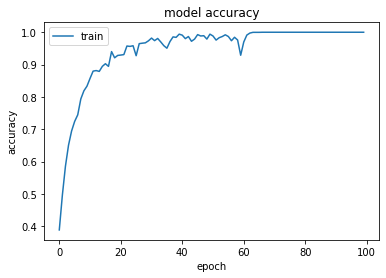

In [42]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

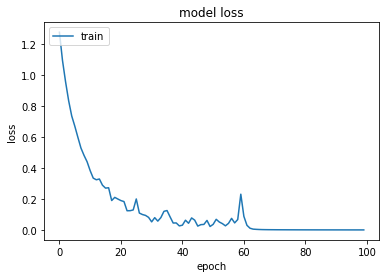

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
test_up = pd.read_csv('/home/lab606a/Documents/datasets/up_speed5_test.csv', header=None)
test_up = test_up.fillna(0)
test_up = np.array(test_up)
test_up.shape

(83, 105)

In [45]:
test_up = sequence.pad_sequences(test_up, maxlen=maxlen, padding='post')
test_up.shape

(83, 60)

In [26]:
pred = model.predict(test_up)
np.set_printoptions(suppress=True)
print(pred)

[[0.47606918 0.00187673 0.52137053 0.00068356]
 [0.52607214 0.00142529 0.47170657 0.00079594]
 [0.793891   0.00169342 0.20405322 0.0003624 ]
 [0.69706774 0.00099665 0.3012615  0.00067409]
 [0.9994288  0.00003997 0.00035114 0.00017999]
 [0.9981394  0.0000545  0.00099261 0.00081353]
 [0.8809725  0.00104615 0.11768147 0.00029987]
 [0.04744756 0.00072893 0.9479527  0.0038707 ]
 [0.9994222  0.00004384 0.00037359 0.00016041]
 [0.9673361  0.00039783 0.03172136 0.00054474]
 [0.13951457 0.15777117 0.70203024 0.00068395]
 [0.9993505  0.00005112 0.00046659 0.0001318 ]
 [0.9992149  0.00005832 0.0005891  0.00013758]
 [0.9992755  0.00004142 0.00043517 0.00024784]
 [0.998544   0.00004874 0.00079228 0.00061504]
 [0.99943334 0.00004144 0.00035158 0.0001736 ]
 [0.99942756 0.00004694 0.00040059 0.00012495]
 [0.99851936 0.00004904 0.00080532 0.0006263 ]
 [0.9991429  0.00004186 0.00050038 0.00031494]
 [0.9982158  0.00009101 0.00155729 0.00013587]
 [0.9994343  0.00004254 0.00035837 0.0001648 ]
 [0.96119565 

In [ ]:
'''
vali = model.predict(x_train)
print("training up:\n", vali[0:4,:])
print("training right:\n", vali[4:8,:])
print("training down:\n", vali[8:12,:])
'''

In [46]:
#model.save('./saved model/classifier20200226_20')

In [ ]:
'''
maxlen = 42*3

up_test = np.array(pd.read_csv('./trajectory/up_len37_2.csv'))
right_test = np.array(pd.read_csv('./trajectory/right_len38.csv'))
down_test = np.array(pd.read_csv('./trajectory/down_len38.csv'))

#35
#38
#38

up_test1 = up_test
right_test1 = right_test
down_test1 = down_test

up_test1 = np.reshape(up_test1,(1,up_test1.shape[0]*up_test1.shape[1]))
right_test1 = np.reshape(right_test1,(1,right_test1.shape[0]*right_test1.shape[1]))
down_test1 = np.reshape(down_test1,(1,down_test1.shape[0]*down_test1.shape[1]))

up_test1 = sequence.pad_sequences(up_test1, maxlen=maxlen, padding='post')
right_test1 = sequence.pad_sequences(right_test1, maxlen=maxlen, padding='post')
down_test1 = sequence.pad_sequences(down_test1, maxlen=maxlen, padding='post')

#up_test = np.reshape(up_test,(int(up_test.shape[1]/3),3))
#right_test = np.reshape(right_test,(int(right_test.shape[1]/3),3))
#down_test = np.reshape(down_test,(int(down_test.shape[1]/3),3))
right_test1.shape
'''

In [ ]:
'''
# 80epoch
pred_up = model.predict(up_test1)
pred_right = model.predict(right_test1)
pred_down = model.predict(down_test1)

np.set_printoptions(suppress=True)
print(pred_up)
print(pred_right)
print(pred_down)
'''

In [ ]:
'''
## top spin
for i in range(3,91,3):
    up_test5 = up_test[:i,:]
    up_test5 = np.reshape(up_test5,(1,up_test5.shape[0]*up_test5.shape[1]))
    up_test5 = sequence.pad_sequences(up_test5, maxlen=maxlen, padding='post')
    
    pred_up5 = model.predict(up_test5)
    
    #print("i = %d, probability = %f" , (i,pred_up5))
    print("number of balls =", int(i/3), ", probability =", pred_up5)
    if max(pred_up5[0,:]) == pred_up5[:,0]:
        print("top spin")
    elif max(pred_up5[0,:]) == pred_up5[:,1]:
        print("right spin")
    else:
        print("back spin")
'''

In [ ]:
'''
## right spin
for i in range(3,91,3):
    up_test5 = right_test[:i,:]
    up_test5 = np.reshape(up_test5,(1,up_test5.shape[0]*up_test5.shape[1]))
    up_test5 = sequence.pad_sequences(up_test5, maxlen=maxlen, padding='post')
    
    pred_up5 = model.predict(up_test5)
    
    #print("i = %d, probability = %f" , (i,pred_up5))
    print("number of balls =", int(i/3), ", probability =", pred_up5)
    if max(pred_up5[0,:]) == pred_up5[:,0]:
        print("top spin")
    elif max(pred_up5[0,:]) == pred_up5[:,1]:
        print("right spin")
    else:
        print("back spin")
'''

In [ ]:
'''
## dwon spin
for i in range(3,91,3):
    up_test5 = down_test[:i,:]
    up_test5 = np.reshape(up_test5,(1,up_test5.shape[0]*up_test5.shape[1]))
    up_test5 = sequence.pad_sequences(up_test5, maxlen=maxlen, padding='post')
    
    pred_up5 = model.predict(up_test5)
    
    #print("i = %d, probability = %f" , (i,pred_up5))
    print("number of balls =", int(i/3), ", probability =", pred_up5)
    if max(pred_up5[0,:]) == pred_up5[:,0]:
        print("top spin")
    elif max(pred_up5[0,:]) == pred_up5[:,1]:
        print("right spin")
    else:
        print("back spin")
'''